###Algorithms Analysis - New Algorithm
- Daniel Aguirre - 201711822 
- Julián Ríos - 201517163
- Ivan Salazar - 201629873

Steps:
1. Create Graph
2. Review Hour Function to Paths Weight
3. Dijkstra

###1. Create Graph
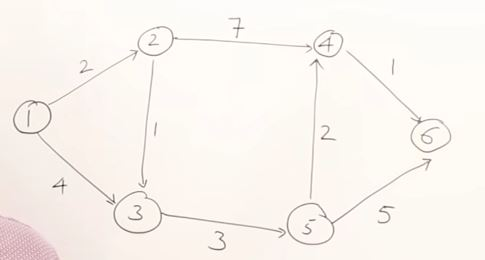

In [59]:
#Create Graph
import networkx as nx
from heapq import heapify, heappush, heappop
import sys

inf = sys.maxsize
G = nx.MultiDiGraph()
r=range(1,7)
G.add_nodes_from (r)
for i in r:
  #G.nodes[i]["s"] = [] #Succesors
  G.nodes[i]["p"] = [] #Predeccesors
  G.nodes[i]["l"] = inf
  G.nodes[i]["d"] = inf
keys = G.add_edges_from ([(1,2,{"c":2}), (1,3,{"c":4}), (2,3,{"c":1}), (2,4,{"c":7}), 
                          (3,5,{"c":3}), (5,4,{"c":2}), (5,6,{"c":5}), (4,6,{"c":1})]) #(v, u, dict with characteristics)
print(G.nodes(data=True))
print(G.edges(data=True))
G.nodes[2]["p"] = G.nodes[1]["p"] #+ list(1)
G.nodes[2]["p"].append(1)
print(G.nodes[1]["p"])
for edge in G[1]:
  print("edge is: ",edge)
  print("cost is: ",G.edges[1,edge,0]["c"]) #IMPORTANT: 1 = source, edge = destiny, 0 = *is nothing, ignore (implementation of newtorkx requires it)*
#For retrive information of a edge if time is a dictionary
#print(G.edges[1,2,0]["time"][1])

# G.nodes[i]["successors"].append(x)
# print (G.nodes[1]["successors"])

#NOTES
#I can asign several variables to each edge, including a dictionary with cost by hour

[(1, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (2, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (3, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (4, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (5, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807}), (6, {'p': [], 'l': 9223372036854775807, 'd': 9223372036854775807})]
[(1, 2, {'c': 2}), (1, 3, {'c': 4}), (2, 3, {'c': 1}), (2, 4, {'c': 7}), (3, 5, {'c': 3}), (4, 6, {'c': 1}), (5, 4, {'c': 2}), (5, 6, {'c': 5})]
[1]
edge is:  2
cost is:  2
edge is:  3
cost is:  4


###2. Review Hour Function to Paths Weight

In [36]:
#Create list of weights for every path every hour: midnight(0-6), morning(6-12), afternoon(12-18), night(18,24)
def review_hour(t):
  if t <= 6:
    return 1
  elif t <= 12:
    return 2
  elif t <= 18:
    return 1.5
  else:
    return 1.25   

###3. Dijkstra

In [75]:
def dijkstra(graph, t0, s): #return dv = shortest path
  #Begin for source node
  G.nodes[s]["l"] = t0
  G.nodes[s]["d"] = 0
  visited = []
  temp = s
  for i in range(len(G.nodes)-1): #loop for every node
    print("actual node", temp)
    if temp not in visited:
      visited.append(temp)
      min_heap = []
      for neighbor in G[temp]: #loop for every neighbor
        print("neighbor: ", neighbor)
        if neighbor not in visited:
          print("weight factor:", review_hour(graph.nodes[temp]["l"]))
          cost = graph.nodes[temp]["d"]+graph.edges[temp,neighbor,0]["c"]*review_hour(graph.nodes[temp]["l"])
          print("Cost is:", cost)
          if cost < graph.nodes[neighbor]["d"]:
            graph.nodes[neighbor]["d"] = cost
            print("actual cost:", graph.nodes[neighbor]["d"])
            graph.nodes[neighbor]["l"] = graph.nodes[temp]["l"] + cost
            graph.nodes[neighbor]["p"] = graph.nodes[temp]["p"] + list(temp) #TODO Fix it
            #graph.nodes[neighbor]["p"].append(temp)
          heappush(min_heap,(graph.nodes[neighbor]["d"],neighbor))
      heapify(min_heap)
      print("min heap:" ,min_heap)
      temp = min_heap[0][1]


  #       graph.nodes[neighbor]["d"] = graph.edges[s,edge,0]["c"]*review_hour(graph.nodes[s]["l"])
  #       G.nodes[neighbor]["l"] = graph.nodes[s]["l"] + graph.edges[s,edge,0]["c"]*review_hour(graph.nodes[s]["l"])
  # visited.append(s)

dijkstra(G,0,1)
print(G.nodes(data=True))

actual node 1
neighbor:  2
weight factor: 1
Cost is: 2
neighbor:  3
weight factor: 1
Cost is: 4
min heap: [(2, 2), (3, 3)]
actual node 2
neighbor:  3
weight factor: 1
Cost is: 3
neighbor:  4
weight factor: 1
Cost is: 9
min heap: [(3, 3), (9, 4)]
actual node 3
neighbor:  5
weight factor: 1
Cost is: 6
min heap: [(6, 5)]
actual node 5
neighbor:  4
weight factor: 2
Cost is: 10
neighbor:  6
weight factor: 2
Cost is: 16
min heap: [(9, 4), (11, 6)]
actual node 4
neighbor:  6
weight factor: 2
Cost is: 11
min heap: [(11, 6)]
[(1, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 0, 'd': 0}), (2, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 2, 'd': 2}), (3, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 5, 'd': 3}), (4, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 11, 'd': 9}), (5, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 11, 'd': 6}), (6, {'p': [1, 1, 1, 2, 2, 3, 5, 4], 'l': 22, 'd': 11})]


In [ ]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
 
# Library for INT_MAX
import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]
 
        self.printSolution(dist)
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
        [4, 0, 8, 0, 0, 0, 0, 11, 0],
        [0, 8, 0, 7, 0, 4, 0, 0, 2],
        [0, 0, 7, 0, 9, 14, 0, 0, 0],
        [0, 0, 0, 9, 0, 10, 0, 0, 0],
        [0, 0, 4, 14, 10, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 1, 6],
        [8, 11, 0, 0, 0, 0, 1, 0, 7],
        [0, 0, 2, 0, 0, 0, 6, 7, 0]
        ];
 
g.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14
